In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import cv2
from config import img_folder, slash

%matplotlib inline                               

In [2]:
def get_target_labels_distribution():
    # load train_labels
    train_labels = pd.read_csv(img_folder + 'train.csv.tgz', compression='gzip', sep=',')
    train_labels.columns = ['business_id', 'labels']
    result = [0, 0, 0, 0, 0, 0, 0, 0, 0]
    reuslt_names = ['0: good_for_lunch', '1:good_for_dinner', '2:takes_reservations', '3:outdoor_seating', '4:restaurant_is_expensive', '5:has_alcohol', '6:has_table_service', '7:ambience_is_classy', '8:good_for_kids']
    
    for _, row in train_labels.iterrows():
        if isinstance(row['labels'], float) and math.isnan(row['labels']):
            continue
            
        labels = row['labels'].split(" ")
        for label in labels:
            result[int(label)] += 1

    return reuslt_names, result

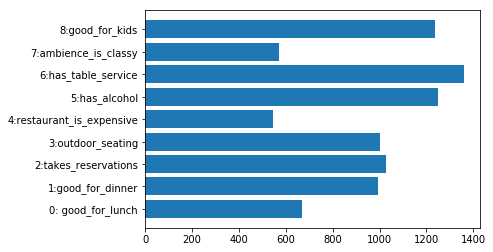

In [3]:
labels_names, labels_values = get_target_labels_distribution()

# plot target labels' distribution 
fig, ax = plt.subplots()
y_pos = np.arange(len(labels_names))
ax.barh(y_pos, labels_values, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(labels_names)
plt.show()

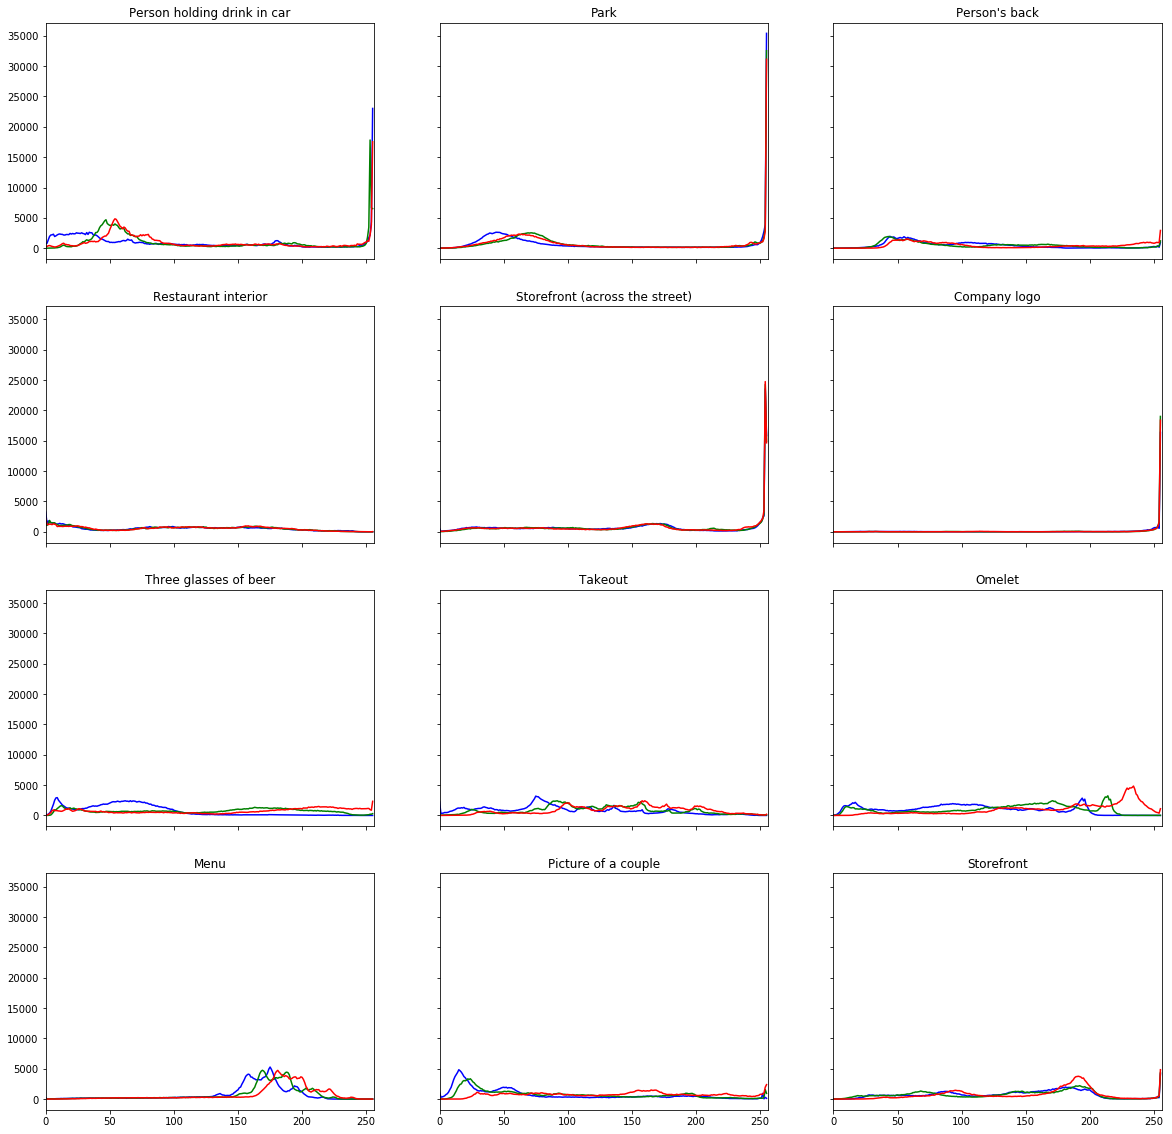

In [20]:
# plotting histograms for color image
visualization_image_folder = './visualization' + slash
rows, cols, img_num = 4, 3, 1
f, axes = plt.subplots(rows, cols, sharex=True, sharey=True)
img_titles = ["Person holding drink in car", "Park", "Person's back", "Restaurant interior", "Storefront (across the street)", 
             "Company logo", "Three glasses of beer", "Takeout", "Omelet", "Menu", "Picture of a couple", "Storefront"]

for i in range(rows):
    for j in range(cols):
        img = cv2.imread(visualization_image_folder + str(img_num) + '.jpg', -1)
        color = ('b','g','r')
        for channel,col in enumerate(color):
            histr = cv2.calcHist([img], [channel], None, [256], [0,256])
            axes[i, j].plot(histr,color = col)
            axes[i, j].set_xlim([0,256])
        axes[i, j].set_title(img_titles[img_num-1])
        img_num += 1

f.set_figheight(20)
f.set_figwidth(20)
plt.show()